In [2]:
import pandas as pd

data='./data/data_ecommerce_customer_churn.csv'
df = pd.read_csv(data)

In [2]:
df.head()

,Tenure,WarehouseToHome,NumberOfDevice,PreferedCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,LastOrder,Cashback,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tenure             3747 non-null   float64
 1   WarehouseToHome    3772 non-null   float64
 2   NumberOfDevice     3941 non-null   int64  
 3   PreferedCat        3941 non-null   object 
 4   SatisfactionScore  3941 non-null   int64  
 5   MaritalStatus      3941 non-null   object 
 6   NumberOfAddress    3941 non-null   int64  
 7   Complain           3941 non-null   int64  
 8   LastOrder          3728 non-null   float64
 9   Cashback           3941 non-null   float64
 10  Churn              3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [10]:
df.drop(columns=['NumberOfAddress'],inplace=True)

In [11]:
df.isnull().sum()

Tenure               194
WarehouseToHome      169
NumberOfDevice         0
PreferedCat            0
SatisfactionScore      0
MaritalStatus          0
Complain               0
LastOrder            213
Cashback               0
Churn                  0
dtype: int64

In [12]:
df.Tenure = df['Tenure'].fillna(df['Tenure'].mean())
df.WarehouseToHome = df['WarehouseToHome'].fillna(df['WarehouseToHome'].mean())
df.LastOrder = df['LastOrder'].fillna(df['LastOrder'].mean())

In [22]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df.PreferedCat=encoder.fit_transform(df.PreferedCat)
df['MaritalStatus']=encoder.fit_transform(df['MaritalStatus'])

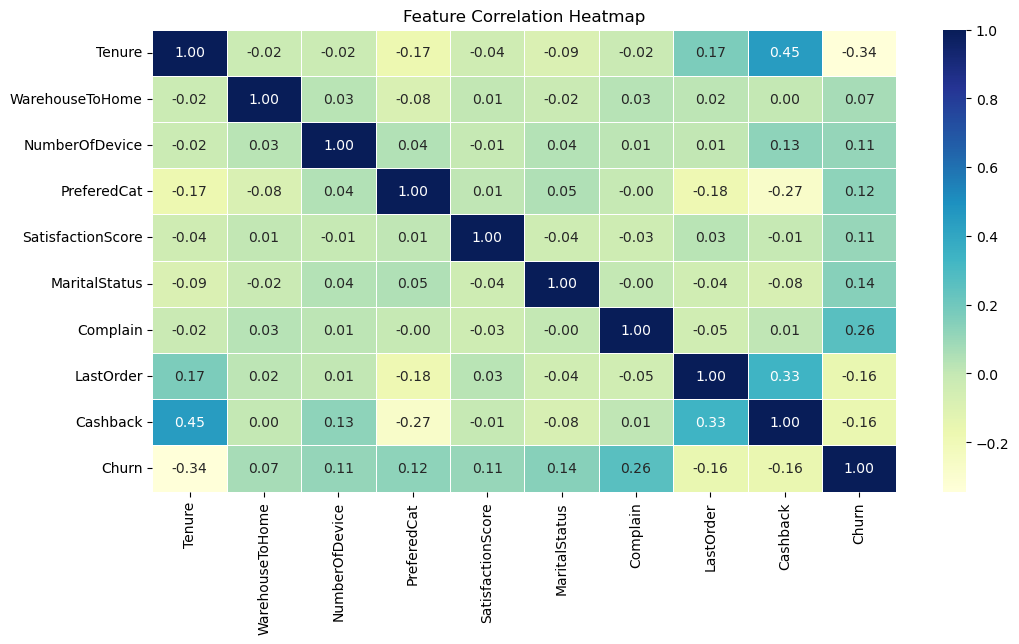

In [23]:
import seaborn as sns

corr_matrix = df.corr()

plt.figure(figsize=(12,6))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.show()


Text(0.5, 1.0, 'Prefered Category')

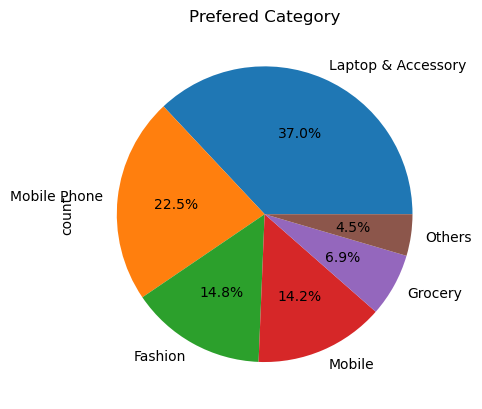

In [6]:
import matplotlib.pyplot as plt

df['PreferedCat'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Prefered Category")

Text(0, 0.5, 'Score')

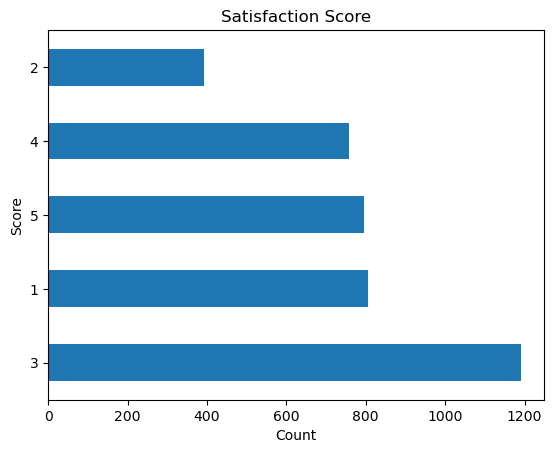

In [7]:
df["SatisfactionScore"].value_counts().plot(kind='barh')
plt.title('Satisfaction Score')
plt.xlabel('Count')
plt.ylabel('Score')

Text(0, 0.5, 'Count')

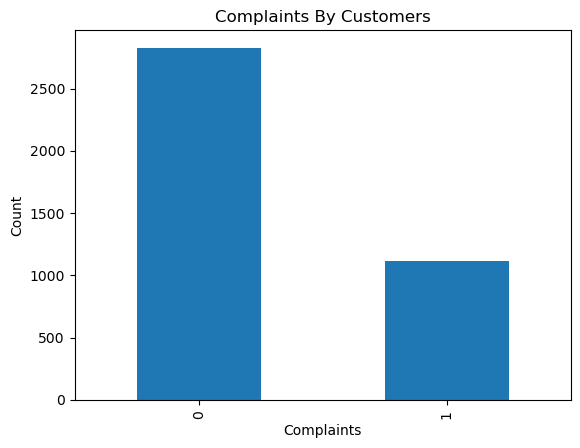

In [8]:
df["Complain"].value_counts().plot(kind='bar')
plt.title('Complaints By Customers')
plt.xlabel('Complaints')
plt.ylabel('Count')

In [14]:
features = []
for feature in df.columns:
    print(feature,end=', ')
    
features = input("\nEnter the feature in the customer : ").split(',')

valid_feature = [feature for feature in features if feature in df.columns]
if not valid_feature or len(features) == 1 :
    print("\nInvalid feature or less number of features")
    exit()
else :
    df1 = pd.read_csv(data,usecols = features+['Churn'])
    col = [feature for feature in df1.columns if feature != 'Churn']
    print("\nSelected features : " + ", ".join(col))

Tenure, WarehouseToHome, NumberOfDevice, PreferedCat, SatisfactionScore, MaritalStatus, Complain, LastOrder, Cashback, Churn, 
Enter the feature in the customer : Tenure,PreferedCat,MaritalStatus

Selected features : Tenure, PreferedCat, MaritalStatus


In [17]:
df1 = df1.dropna(subset=['Tenure'])

In [13]:
df1.head()

,Tenure,PreferedCat,MaritalStatus,Cashback,Churn
0,15.0,Laptop & Accessory,Single,143.32,0
1,7.0,Mobile,Married,129.29,0
2,27.0,Laptop & Accessory,Married,168.54,0
3,20.0,Fashion,Divorced,230.27,0
4,30.0,Others,Single,322.17,0


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

preprocessing = ColumnTransformer(
    transformers = [
        ('number_col','passthrough',[feature for feature in valid_feature if df1[feature].dtype in ['int64','float64']]),
        ('string_col', OneHotEncoder(handle_unknown='ignore'), [feature for feature in valid_feature if df1[feature].dtype == 'object'])

    ]
)

model = Pipeline(
    steps = [
        ('process',preprocessing),
        ('regressor',RandomForestClassifier(n_estimators=100, random_state=42))
        #('regressor',LogisticRegression())
    ]
)


X=df1.drop(columns=['Churn'])
y=df1['Churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model.fit(X_train,y_train)

Pipeline(steps=[('process',
                 ColumnTransformer(transformers=[('number_col', 'passthrough',
                                                  ['Tenure']),
                                                 ('string_col',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['PreferedCat',
                                                   'MaritalStatus'])])),
                ('regressor', RandomForestClassifier(random_state=42))])

In [19]:
X_train.head()

,Tenure,PreferedCat,MaritalStatus
511,4.0,Mobile Phone,Single
2510,30.0,Laptop & Accessory,Married
3474,1.0,Mobile Phone,Single
2726,13.0,Laptop & Accessory,Married
273,4.0,Mobile Phone,Single


In [20]:
user_input={}
for feature in features:
    user_input[feature] = input(f"{feature} : ").strip()
    
user_df = pd.DataFrame([user_input])
user_df_transformed = model.named_steps['process'].transform(user_df)
y_pred = model.named_steps['regressor'].predict(user_df_transformed)

print(f"{'Probably customer churned or will leave the service' if y_pred[0] == 1 else 'Predicted that customer is still active'}")


Tenure : 20
PreferedCat : Others
MaritalStatus : Single
Predicted that customer is still active


In [21]:
from sklearn.metrics import accuracy_score, classification_report,r2_score

y_pred1 = model.predict(X_test)

print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.97      0.92       628
           1       0.68      0.36      0.47       122

    accuracy                           0.87       750
   macro avg       0.78      0.66      0.70       750
weighted avg       0.85      0.87      0.85       750



In [22]:
print("\nModel Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred1))
print(f"R^2 Score : {r2_score(y_test, y_pred1):.4f}")


Model Performance:
Accuracy: 0.868
R^2 Score : 0.0309
